In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Loading Data

In [48]:
# Mengambil data dengan membaca csv
df = pd.read_csv('data_for_modelling.csv')
df

,date,status,fulfilment,sales_channel,ship_service_level,category,size,amazon_standard_id,qty,currency,sales,clean_ship_state,promotion_used
0,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,B07WV4JV4D,1,INR,329.0,Maharashtra,True
1,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,B098714BZP,1,INR,574.0,Tamil Nadu,False
2,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Set,XL,B08YN7XDSG,1,INR,824.0,Uttar Pradesh,True
3,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Set,L,B08CMHNWBN,1,INR,653.0,Chandigarh,True
4,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,kurta,XXL,B08B3XF5MH,1,INR,363.0,Tamil Nadu,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77687,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,B098112V2V,1,INR,517.0,Telangana,False
77688,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Set,M,B09VC6KHX8,1,INR,999.0,Haryana,True
77689,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Western Dress,XXL,B0982YZ51B,1,INR,690.0,Telangana,False
77690,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Set,XS,B0894Y2NJQ,1,INR,1199.0,Gujarat,True


In [49]:
data = df.copy()

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77692 entries, 0 to 77691
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                77692 non-null  object 
 1   status              77692 non-null  object 
 2   fulfilment          77692 non-null  object 
 3   sales_channel       77692 non-null  object 
 4   ship_service_level  77692 non-null  object 
 5   category            77692 non-null  object 
 6   size                77692 non-null  object 
 7   amazon_standard_id  77692 non-null  object 
 8   qty                 77692 non-null  int64  
 9   currency            77692 non-null  object 
 10  sales               77692 non-null  float64
 11  clean_ship_state    77692 non-null  object 
 12  promotion_used      77692 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 7.2+ MB


In [51]:
data.isnull().sum()

date                  0
status                0
fulfilment            0
sales_channel         0
ship_service_level    0
category              0
size                  0
amazon_standard_id    0
qty                   0
currency              0
sales                 0
clean_ship_state      0
promotion_used        0
dtype: int64

In [52]:
data['date'] = pd.to_datetime(data['date'])

In [53]:
data = data.groupby('date')['sales'].sum().reset_index()
data

,date,sales
0,2022-03-31,84013.0
1,2022-04-01,635277.0
2,2022-04-02,673257.0
3,2022-04-03,737777.0
4,2022-04-04,630021.0
...,...,...
86,2022-06-25,468786.0
87,2022-06-26,523264.0
88,2022-06-27,462018.0
89,2022-06-28,459203.0


In [ ]:
data = data.set_index('date')

In [79]:
data.head()

,sales
date,
2022-03-31,84013.0
2022-04-01,635277.0
2022-04-02,673257.0
2022-04-03,737777.0
2022-04-04,630021.0


In [55]:
# Normalisasi
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [56]:
len(data_scaled)

91

In [57]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 1
X, y = create_sequences(data_scaled, window_size)

In [ ]:
# Splitting between train and test
split = int(0.9 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Model Definition

In [59]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(window_size, 1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
model.summary()

c:\Users\Acer\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 1, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [60]:
model.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_test, y_test))

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.0000e+00 - loss: 0.6167 - val_accuracy: 0.0000e+00 - val_loss: 0.3467
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.4844 - val_accuracy: 0.0000e+00 - val_loss: 0.1665
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0029 - loss: 0.1776 - val_accuracy: 0.0000e+00 - val_loss: 0.1964
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0077 - loss: 0.1057 - val_accuracy: 0.0000e+00 - val_loss: 0.1168
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0250 - loss: 0.0854 - val_accuracy: 0.0000e+00 - val_loss: 0.1174
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0212 - loss: 0.0934 - val_accuracy: 0.0000e+00 - val_loss: 0.1332
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0051 - loss: 0.0710 - val_accuracy: 0.0000e+00 - val_loss: 0.0975
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.00

# Model Evaluation

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step 


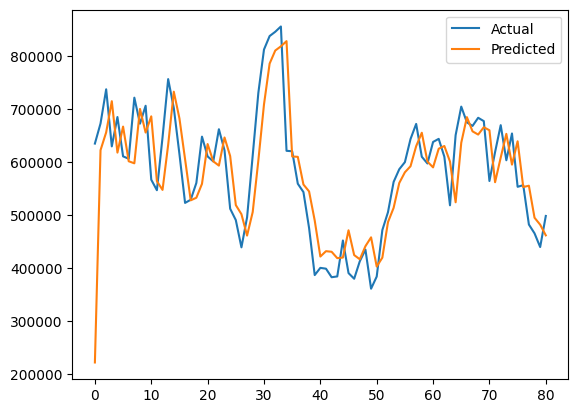

In [69]:
y_pred_train = model.predict(X_train)

# Invers transform hasil prediksi dan y_train
y_pred_inv_train = scaler.inverse_transform(y_pred_train)
y_train_inv = scaler.inverse_transform(y_train)

# Visualisasi Train
plt.plot(y_train_inv, label='Actual')
plt.plot(y_pred_inv_train, label='Predicted')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


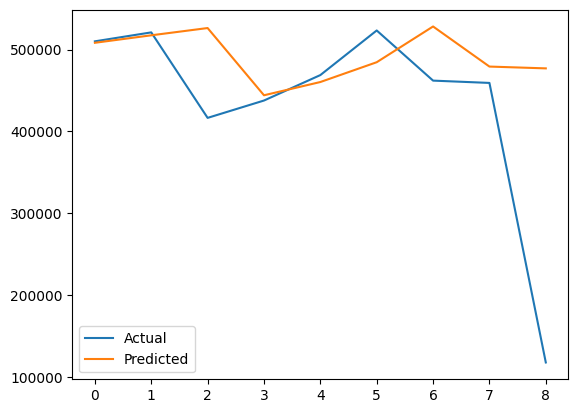

In [75]:
y_pred_test = model.predict(X_test)

# Invers transform hasil prediksi dan y_test
y_pred_inv_test = scaler.inverse_transform(y_pred_test)
y_test_inv = scaler.inverse_transform(y_test)

# Visualisasi
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv_test, label='Predicted')
plt.legend()
plt.show()

In [76]:
mae_train = mean_absolute_error(y_train_inv, y_pred_inv_train)
mae_test = mean_absolute_error(y_test_inv, y_pred_inv_test)
print(f"MAE Train : {mae_train}")
print(f"MAE Test : {mae_test}")

MAE Train : 57126.705054012345
MAE Test : 68216.42013888889


In [77]:
mape_train = mean_absolute_percentage_error(y_train_inv, y_pred_inv_train)
mape_test = mean_absolute_percentage_error(y_test_inv, y_pred_inv_test)
print(f"MAPE Train : {mape_train}")
print(f"MAPE Test : {mape_test}")

MAPE Train : 0.09918176224502928
MAPE Test : 0.40165146503485694
